In [743]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

np.random.seed(10)


In [744]:
dataset = pd.read_csv('/home/nux/Desktop/Hands-on-Machine-Learning/datasets/mobile_train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [745]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [746]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# EDA

In [747]:
cat_fea = [feature for feature in dataset.columns if len(dataset[feature].unique()) < 3]

cat_fea

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

### check the missing values 

In [748]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

okey, we don't have any missing values. so, we can say that almost half of our work has already been done . Haha 

**Correaltion between Features**

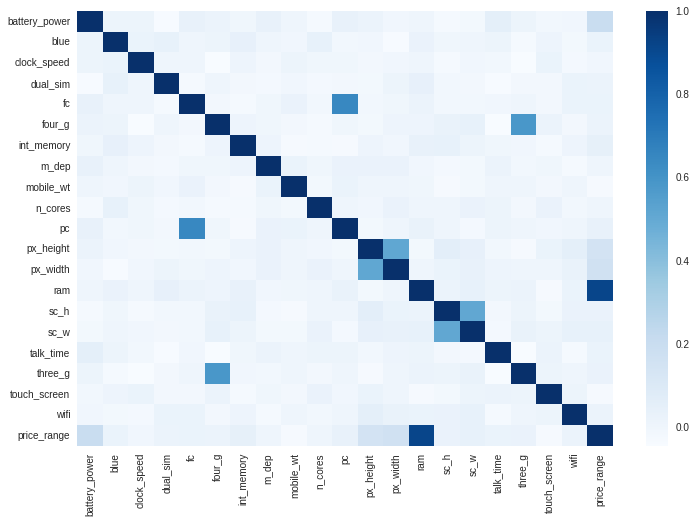

In [749]:
corr = dataset.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Blues')
plt.show()

In [750]:
corr.sort_values(by=['price_range'], ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

First of all, our target feature is **price_range**. This feature has highly correleated with features such as 
* ram
* battery_power
* px_height
* px_width

Since, price_range feature has high correaltion with ram. so we want to see the ram distribution and relation with price range.

Text(0.5, 1.0, 'Distribution of Ram')

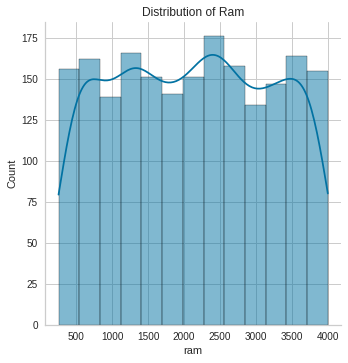

In [751]:
sns.displot(dataset['ram'], kde=True)
plt.title('Distribution of Ram')

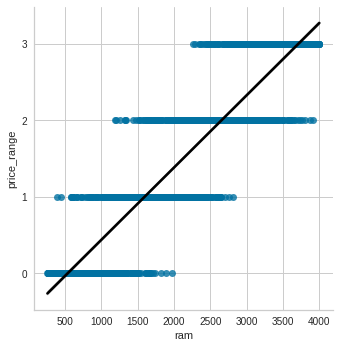

In [752]:
sns.lmplot(x='ram', y='price_range', data=dataset, line_kws={'color':'black'})
plt.yticks([0, 1, 2, 3])
plt.show()

observation: when ram increases, the price also increases.

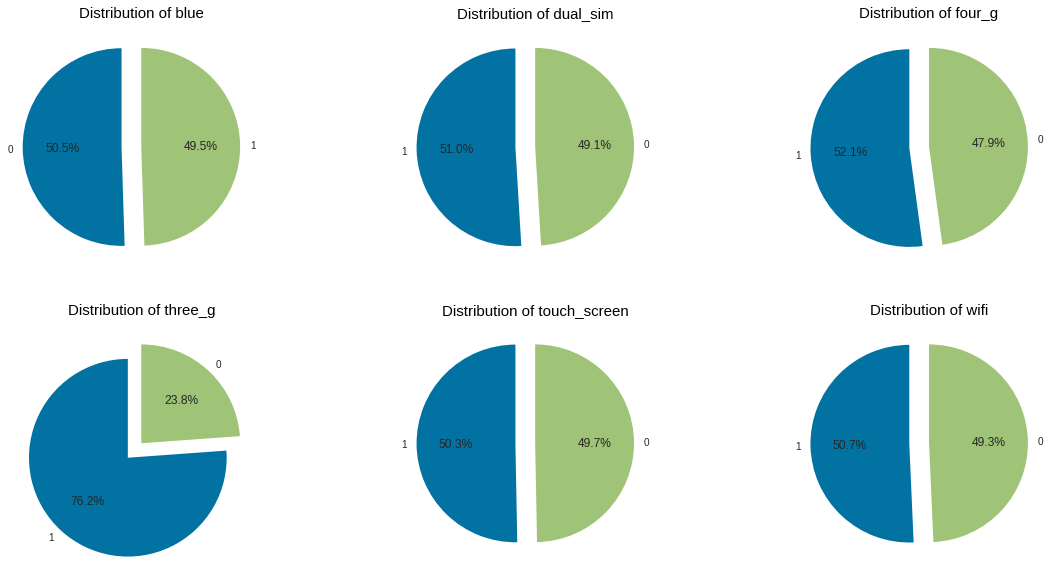

In [753]:
categorical_feature = [feature for feature in dataset.columns if len(dataset[feature].unique()) < 3]

plt.figure(figsize=(20, 10))
count = 0
for feature in categorical_feature:
    data = dataset.copy()
    explode = [0.2, 0]

    labels = data[feature].value_counts().index
    sizes = data[feature].value_counts().values

    plt.subplot(2, 3, count+1)
    plt.pie(sizes, labels=labels, explode=explode, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {categorical_feature[count]}', color='black', fontsize=15)
    count += 1
    

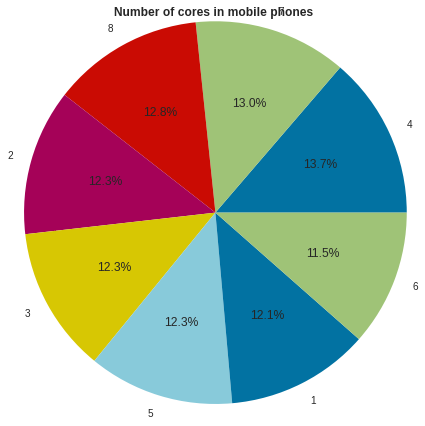

In [754]:
n_cores = dataset['n_cores'].value_counts()
plt.title('Number of cores in mobile phones \n\n\n', weight='bold')
n_cores.plot.pie(autopct='%.1f%%', radius = 1.6)
plt.show()



***Let's find relation of our features along with ram and price_range***

**BATTERY POWER- RAM AND PRICE RANGE**

<AxesSubplot:xlabel='battery_power', ylabel='ram'>

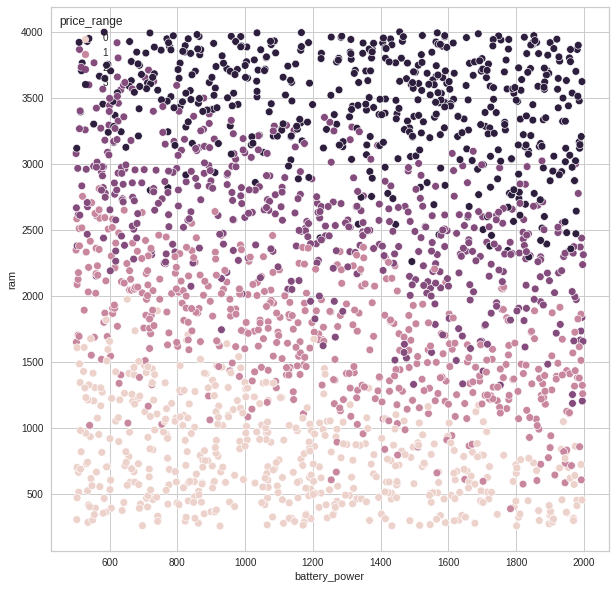

In [755]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=dataset, x='battery_power', y='ram', hue='price_range',markers=['8', 'p'], s=60)

**INTERNAL MEMORY IN GIGABYTE - RAM AND PRICE RANGE**

<AxesSubplot:xlabel='int_memory', ylabel='ram'>

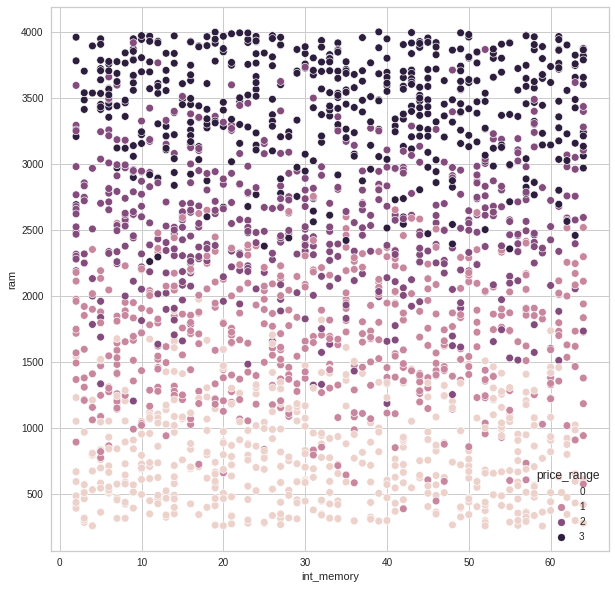

In [756]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=dataset, x='int_memory', y='ram', hue='price_range', s=60)

**TOUCH SCREEN-RAM AND PRICE RANGE**

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

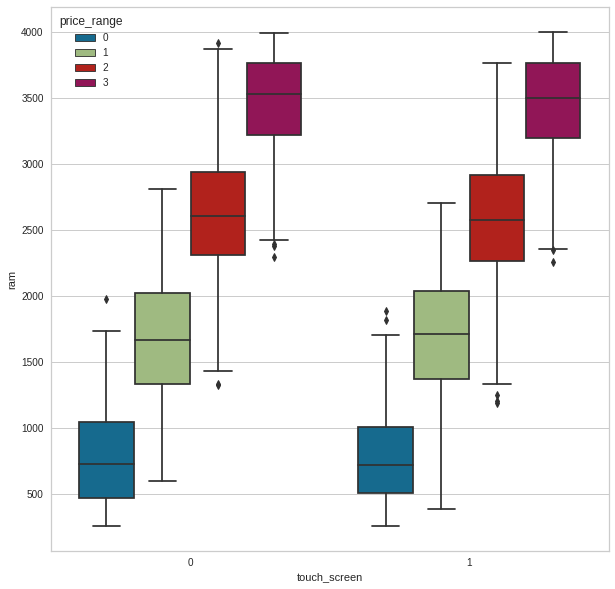

In [757]:
plt.figure(figsize=(10,10))
sns.boxplot(x='touch_screen', y='ram', hue='price_range', data=dataset)

**3G-RAM and Price Range**

<AxesSubplot:xlabel='three_g', ylabel='ram'>

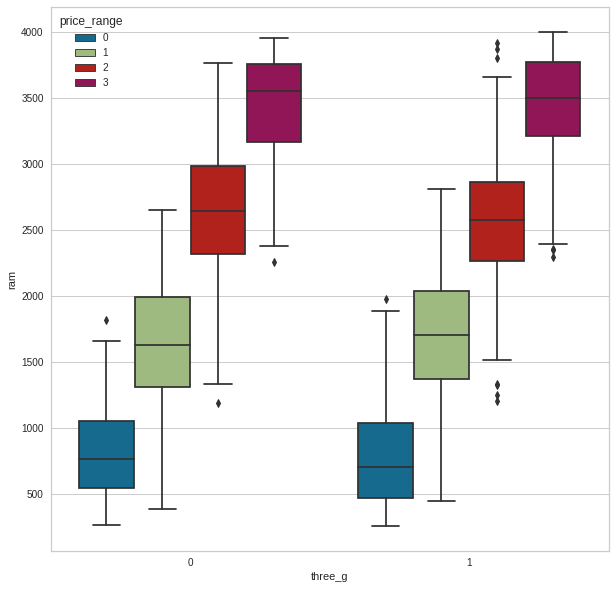

In [758]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='three_g', y='ram', hue='price_range', data=dataset)

**4G-RAM- PRICE RANGE**

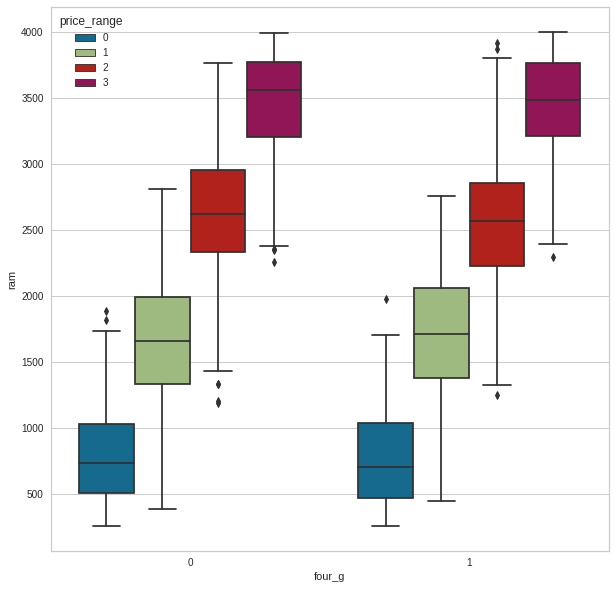

In [759]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='four_g', y='ram', hue='price_range', data=dataset)
plt.show()

**NUMBER OF CORES OF PROCESOR(n_cores)- RAM and PRICE RANGE**

/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
 

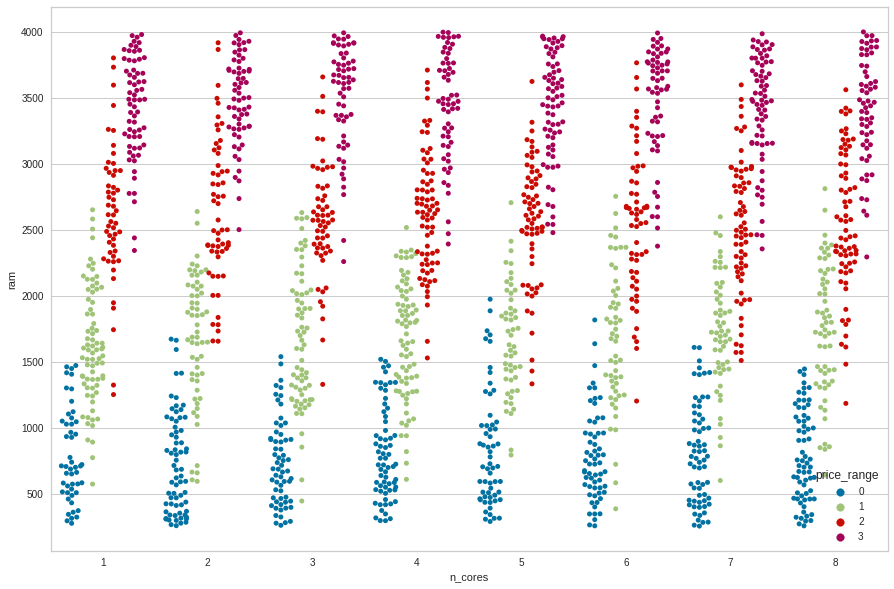

In [760]:
plt.figure(figsize=(15, 10))
sns.swarmplot(x='n_cores', y='ram', hue='price_range', data=dataset, dodge=True)
plt.show()

Primary Camera mega pixels(pc) - RAM and Price Range

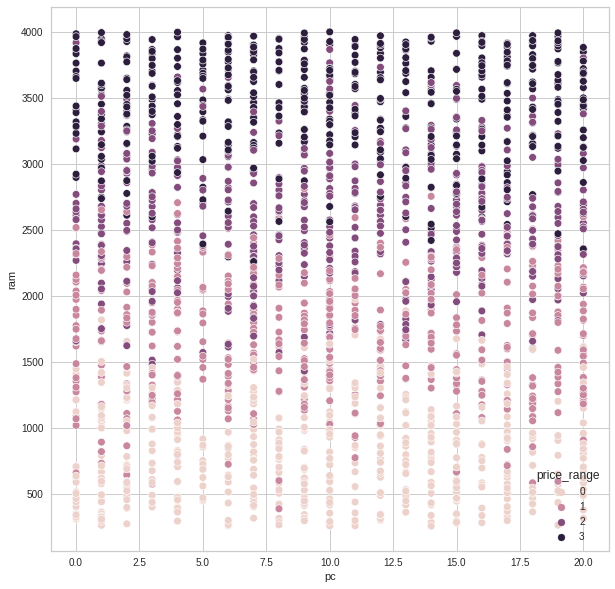

In [761]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='pc', y='ram', hue='price_range', data=dataset, s=60)
plt.show()

**Front Camera mega pixels(fc) - RAM and Price Range**

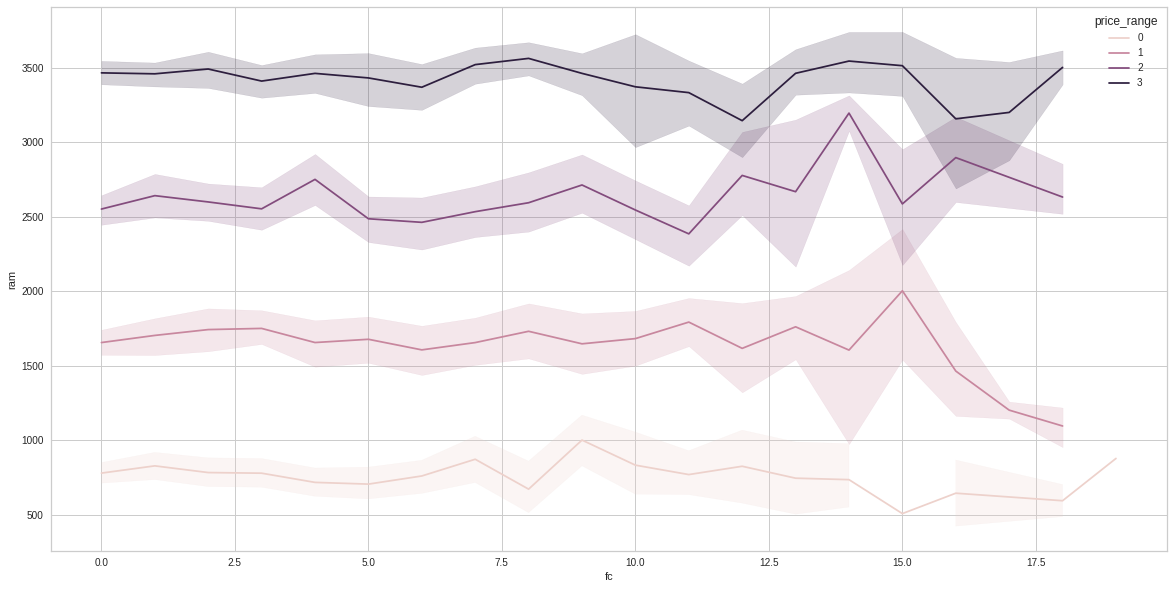

In [762]:
plt.figure(figsize=(20,10))
sns.lineplot(x='fc', y='ram', hue='price_range', data=dataset)
plt.show()

**Weight of mobile phone(mobile_wt)- RAM and Price Range**

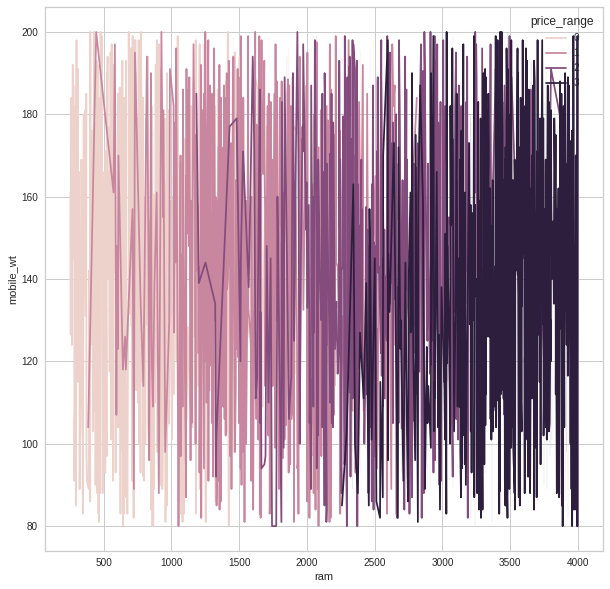

In [763]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=dataset, x='ram', y='mobile_wt', hue='price_range')
plt.show()

**Mobile Depth in cm (m_dep) - RAM and Price Range**

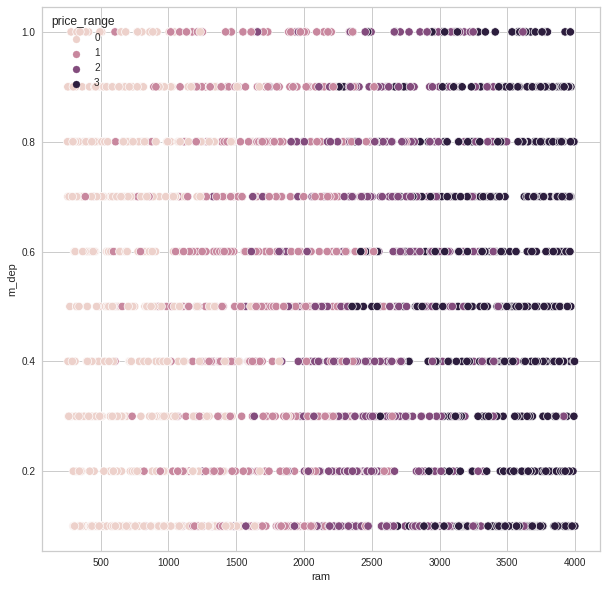

In [764]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='ram', y='m_dep', hue='price_range', data=dataset, s=70)
plt.show()

**Pixel Resolution Height(px_height) - RAM and Price Range**

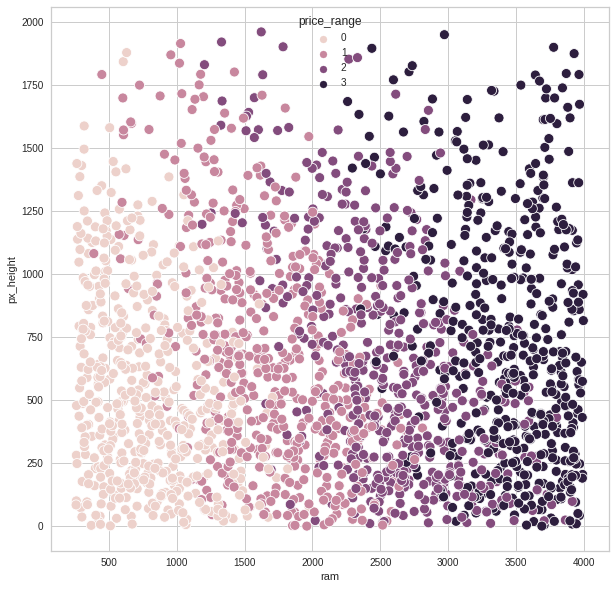

In [765]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='ram', y='px_height', hue='price_range', data=dataset, s=100)
plt.show()

**Pixel Resolution Width(px_width) - RAM and Price Range**


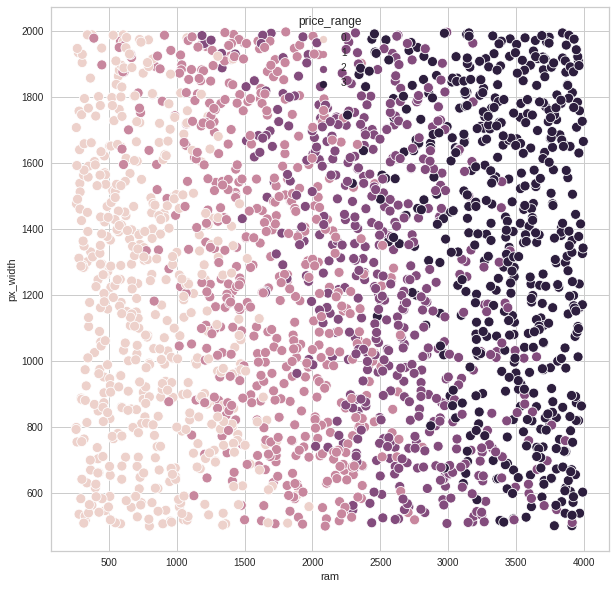

In [766]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='ram', y='px_width', hue='price_range', data=dataset, s=100)
plt.show()

**Clock Speed(clock_speed) - RAM and Price Range**

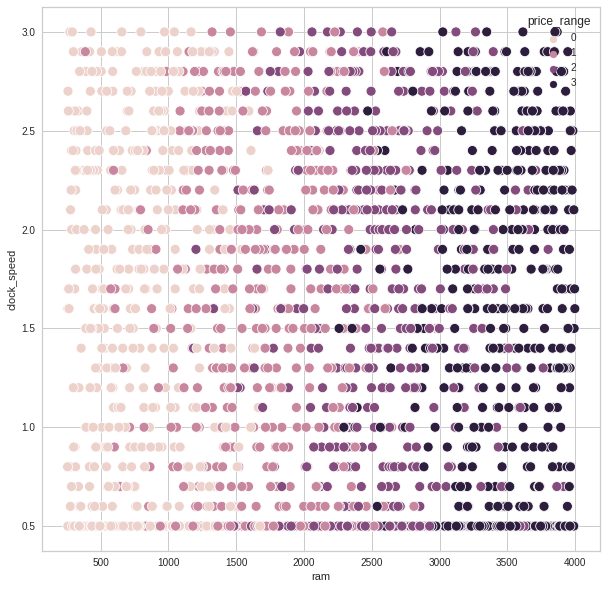

In [767]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='ram', y='clock_speed', hue='price_range', data=dataset, s=100)
plt.show()

**WIFI-RAM and PRICE RANGE**

/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
 

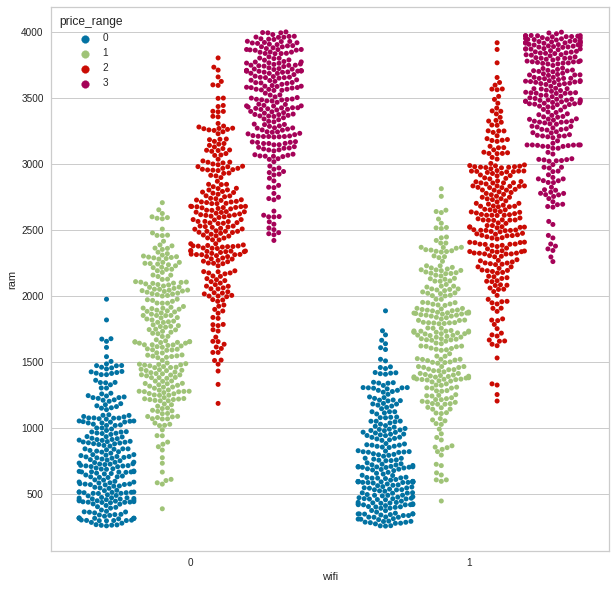

In [768]:
plt.figure(figsize=(10, 10))
sns.swarmplot(x='wifi', y='ram', hue='price_range', data=dataset, dodge=True)
plt.show()

**DUAL SIM- RAM AND PRICE RANGE**

/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

<Figure size 720x720 with 0 Axes>

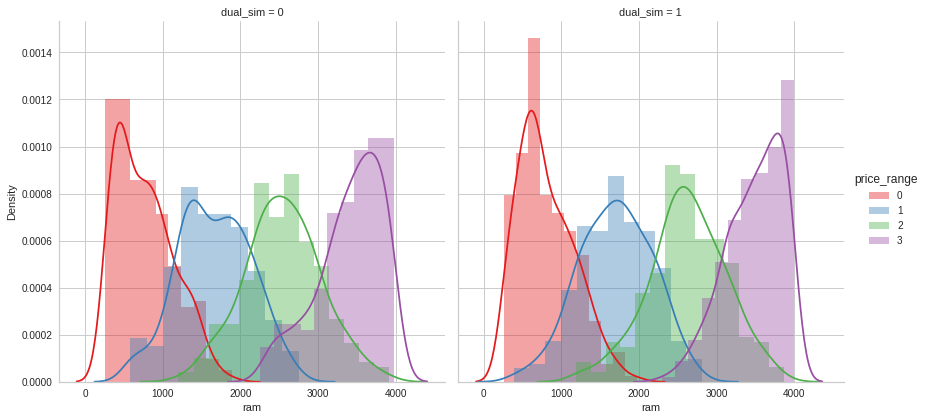

In [769]:
plt.figure(figsize=(10, 10))
g = sns.FacetGrid(data=dataset, col='dual_sim', hue='price_range', palette='Set1', height=6)
g = (g.map(sns.distplot, 'ram').add_legend())
plt.show()

**Screen Height of mobile(sc_h) - RAM and Price Range**

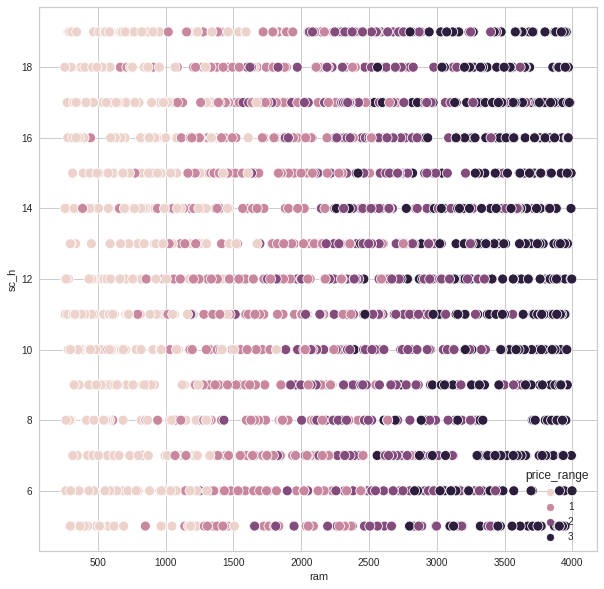

In [770]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='ram', y='sc_h', hue='price_range', data=dataset, s=100)
plt.show()

**Screen Width of mobile(sc_w) - RAM and Price Range**

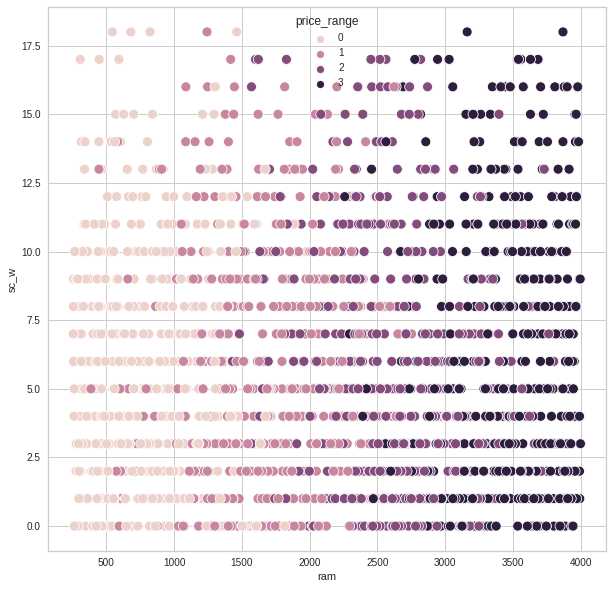

In [771]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='ram', y='sc_w', hue='price_range', data=dataset, s=100)
plt.show()

After EDA, we can say that ram feature affects the price range to a great extent. Also battery_power, pixel_height, pixel_width affect the price range slightly.

Train-test-split

In [772]:
x = dataset.drop(['price_range'], axis=1)
y = dataset['price_range'].values
X = (x- np.min(x)) / (np.max(x) - np.min(x))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [773]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1600
400
1600
400


Class balance Visualization

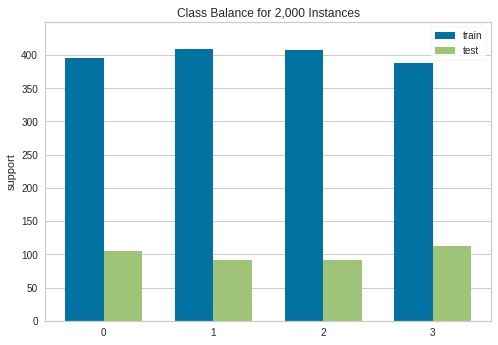

<AxesSubplot:title={'center':'Class Balance for 2,000 Instances'}, ylabel='support'>

In [774]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(lables=[0, 1, 2, 3])
visualizer.fit(y_train, y_test)
visualizer.show()

Members of all classes are about the same.

## Model creation

In [775]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train, y_train)
print('Train accuracy:', svm.score(x_train, y_train))
print('Test accuracy:', svm.score(x_test, y_test))

Train accuracy: 0.969375
Test accuracy: 0.8625


## Feature selection

In [776]:
from sklearn.feature_selection import mutual_info_classif


In [777]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.02868966, 0.01750968, 0.        , 0.        , 0.        ,
       0.01610767, 0.02225105, 0.        , 0.01713911, 0.00842323,
       0.01993835, 0.03455405, 0.04136506, 0.84295259, 0.02264481,
       0.        , 0.01910407, 0.01271114, 0.01225865, 0.        ])

In [778]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

ram              0.842953
px_width         0.041365
px_height        0.034554
battery_power    0.028690
sc_h             0.022645
int_memory       0.022251
pc               0.019938
talk_time        0.019104
blue             0.017510
mobile_wt        0.017139
four_g           0.016108
three_g          0.012711
touch_screen     0.012259
n_cores          0.008423
m_dep            0.000000
fc               0.000000
dual_sim         0.000000
clock_speed      0.000000
sc_w             0.000000
wifi             0.000000
dtype: float64

<AxesSubplot:>

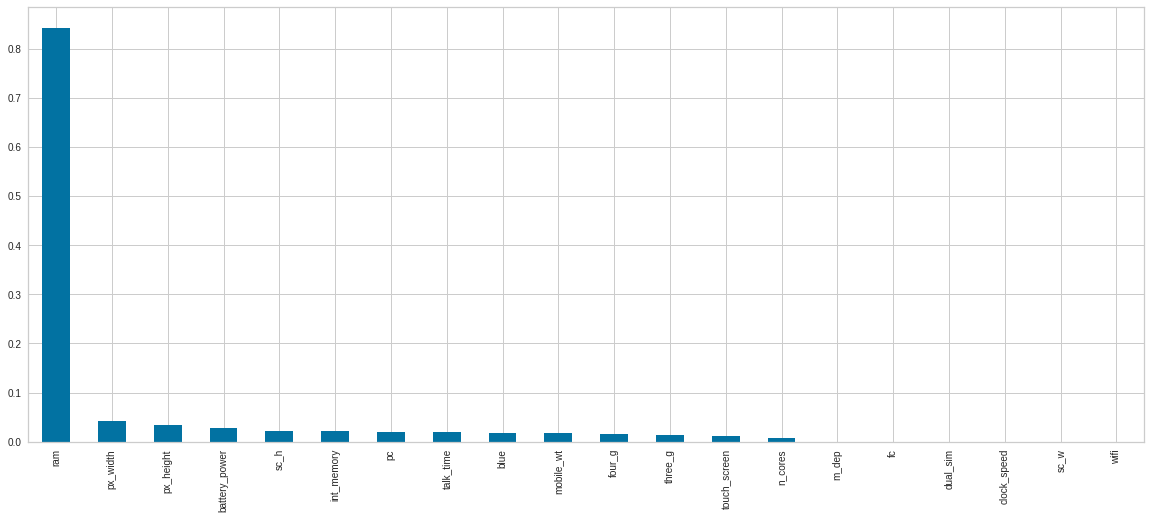

In [779]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [780]:
from sklearn.feature_selection import SelectKBest

In [812]:
# we will select the toop 5 important featues

sel_five_cols = SelectKBest(mutual_info_classif, k=5)
x_new = sel_five_cols.fit_transform(x_train, y_train)
x_new_test = sel_five_cols.transform(x_test)

names_train = x_train.columns.values[sel_five_cols.get_support()]
names_test = x_test.columns.values[sel_five_cols.get_support()]

print('x_train feature: ', names_train)
print('x_test feature: ', names_test)

x_train feature:  ['battery_power' 'px_height' 'px_width' 'ram' 'sc_w']
x_test feature:  ['battery_power' 'px_height' 'px_width' 'ram' 'sc_w']


### Model with GridSearchCV

In [813]:
from sklearn.model_selection import GridSearchCV

In [814]:
C = [1, 0.1, 0.25, 0.5, 2, 0.75]
kernel = ['linear', 'rbr']
gamma = ['auto', 0.01, 0.001, 0.0001, 1]
decision_function_shape = ['ovo', 'ovr']


In [815]:
svm = SVC(random_state=42)

grid_svm = GridSearchCV(svm, param_grid = dict(kernel=kernel, C=C, gamma=gamma, decision_function_shape=decision_function_shape), cv=5)
grid_svm.fit(x_new, y_train)
print('Best Score: ', grid_svm.best_score_)
print('Best Param: ', grid_svm.best_params_)

Best Score:  0.953125
Best Param:  {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/nux/Desktop/Hands-on-Machine-

CV Scores

**StratifiedKFold** is used when is need to balance of percentage each class in train & test.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [816]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

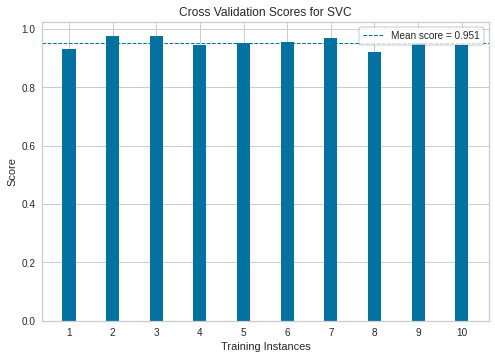

<AxesSubplot:title={'center':'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [817]:
_, ax = plt.subplots()

cv = StratifiedKFold(10)

cvscore = CVScores(
        SVC(C = 1, decision_function_shape = 'ovo', gamma =  'auto', kernel = 'linear', random_state=42),
        ax = ax,
        cv = cv, 
        scoring='accuracy'
)
cvscore.fit(x_new, y_train)
cvscore.show()

### Building Model

In [819]:
final_svm_model = SVC(C=1,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1)

In [820]:
final_svm_model.fit(x_new, y_train)

SVC(C=1, decision_function_shape='ovo', gamma='auto', kernel='linear',
    random_state=1)

In [821]:
print('Train accuracy: ', final_svm_model.score(x_new, y_train) )
print('Test accuracy: ', final_svm_model.score(x_new_test, y_test))

Train accuracy:  0.955625
Test accuracy:  0.9725


### Prediction Visualization

In [822]:
y_pred = final_svm_model.predict(x_new_test)

In [827]:
svm_test = x_test[['battery_power', 'px_height', 'px_width', 'ram', 'sc_w']]

In [828]:
svm_test['y_true'] = y_test
svm_test['y_pred'] = y_pred

/tmp/ipykernel_7472/3733532610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_test['y_true'] = y_test
/tmp/ipykernel_7472/3733532610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svm_test['y_pred'] = y_pred


In [829]:
svm_test.head()

,battery_power,px_height,px_width,ram,sc_w,y_true,y_pred
1860,0.764863,0.107653,0.739653,0.114912,0.333333,0,0
353,0.454910,0.140306,0.324433,0.616515,0.944444,2,2
1333,0.982632,0.149490,0.301736,0.283271,0.055556,1,1
905,0.325985,0.130612,0.596796,0.971673,0.388889,3,3
1289,0.076152,0.520918,0.973298,0.440941,0.277778,1,1
